# Analysis of Graduate Admissions
- Problem statement : Analysis the chance of admission of a student when apply for a master program.
- Goals: <br> 
    1.Check completeness of dataset. <br> 
    2.Find what attributes are important for a student to get into a graduate school.<br> 
    3.Find model to predict the 'Chance of Admit' \n
- Link Dataset : https://www.kaggle.com/mohansacharya/graduate-admissions


# Read data file

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os

pd.set_option('display.expand_frame_repr', False)
df = pd.read_csv('C:/Users/Admin/Desktop/Presentation for Simulation/Admission_Predict.csv',index_col=0) 
df.head(5)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


# Check completeness of dataset

In [185]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Find correlation between attributes

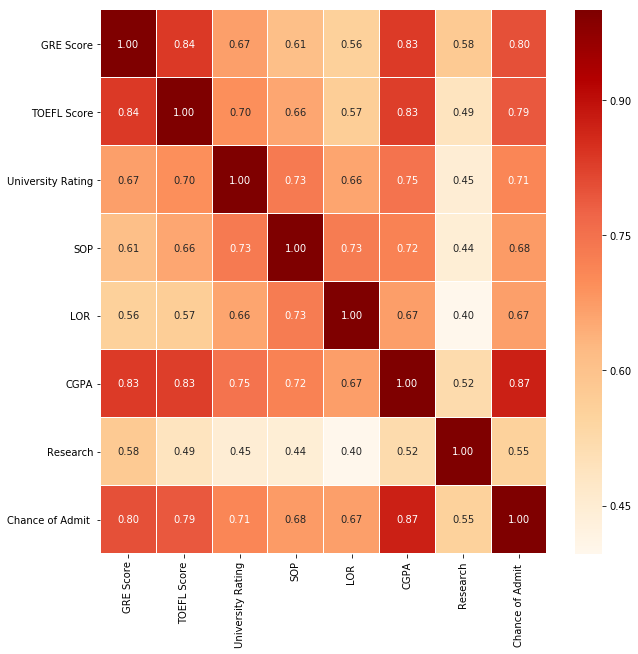

In [186]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="OrRd")
plt.show()

# Build learning model


## Set input features and target features

In [187]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [189]:
X=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit ']



## Split data into 80% training and 20% testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=101)

### Standardize data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)



## Import libraries for models 


In [168]:
#Libarary for Regression problems
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

#library for model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Build models

In [196]:
regressions=[['Linear Regression :',LinearRegression()],
       ['Decision Tree Regressor :',DecisionTreeRegressor(random_state=36,max_depth=100,min_samples_leaf=10)],
       ['RandomForest :',RandomForestRegressor( n_estimators=100, criterion='mse',max_depth=12,random_state=10)], 
       ['KNN :',  KNeighborsRegressor(n_neighbors=9,metric='euclidean')],        
       ['SVM :', SVR(kernel = 'linear')]]          

for name,model in regressions:
    model=model
    model.fit(X_train,y_train_c)
    predictions = model.predict(X_test)     
    # Evaluate result of prediction
    print(" Result of ",name, " :")
    print("Mean absolute error:",mean_absolute_error(y_test_c,predictions))
    print( "Mean squared error :",mean_squared_error(y_test_c,predictions))
    print( "R2 score :",r2_score(y_test_c,predictions), '\n')
   


 Result of  Linear Regression :  :
Mean absolute error: 0.24399446700125554
Mean squared error : 0.0822467895260485
R2 score : 0.3549271409721685 

 Result of  Decision Tree Regressor :  :
Mean absolute error: 0.08658253205128205
Mean squared error : 0.049789800816431834
R2 score : 0.6094917583024952 

 Result of  RandomForest :  :
Mean absolute error: 0.09787499999999999
Mean squared error : 0.053003749999999995
R2 score : 0.5842843137254902 

 Result of  KNN :  :
Mean absolute error: 0.09722222222222224
Mean squared error : 0.04228395061728395
R2 score : 0.6683611716291454 

 Result of  SVM :  :
Mean absolute error: 0.24997832707756826
Mean squared error : 0.08862825280696926
R2 score : 0.30487644857278995 

